In [1]:
#On fait les imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ace_tools_open as tools


<Axes: xlabel='Domicile', ylabel='count'>

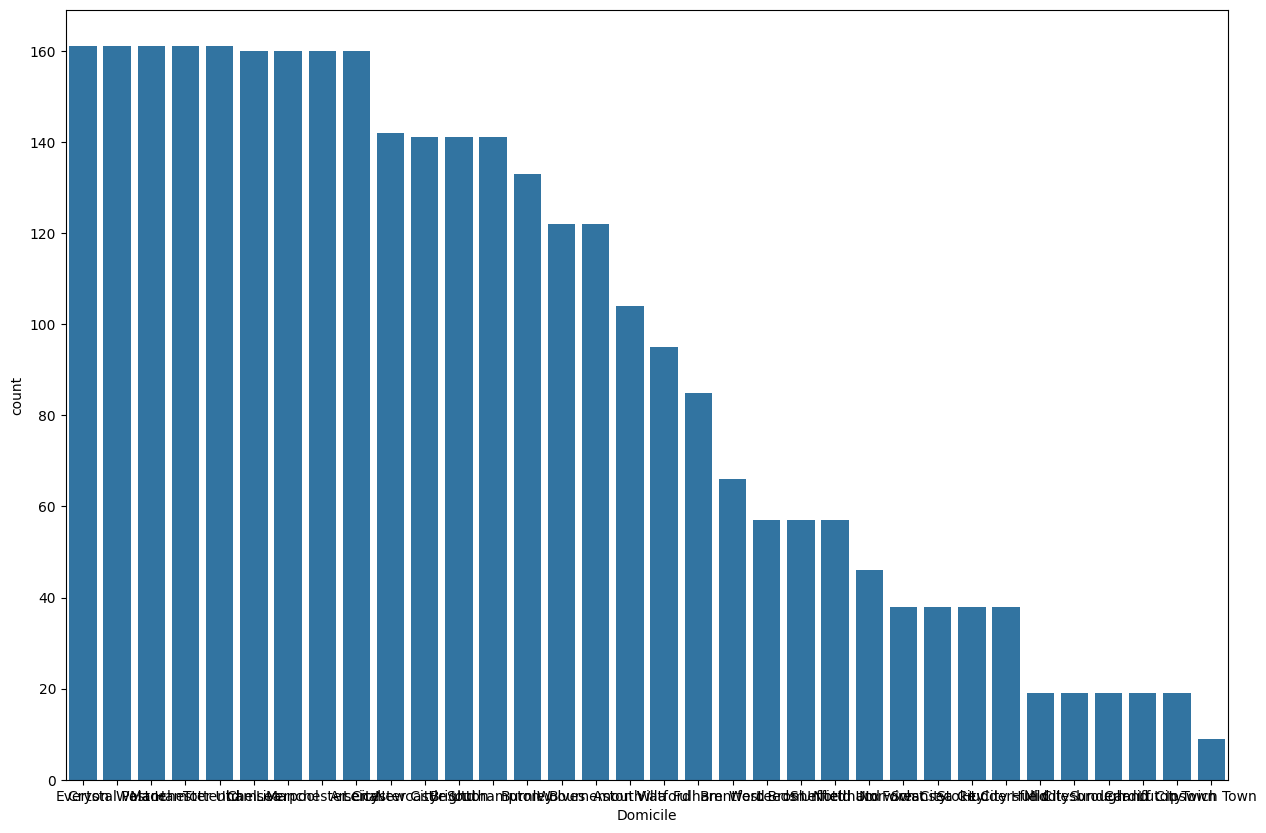

In [2]:
# Load the data
df = pd.read_csv("Calendrier_et_resultats_Premier_League_clean.csv", index_col=['Date'])
df.index = pd.to_datetime(df.index)

plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='Domicile', order=df['Domicile'].value_counts().index)

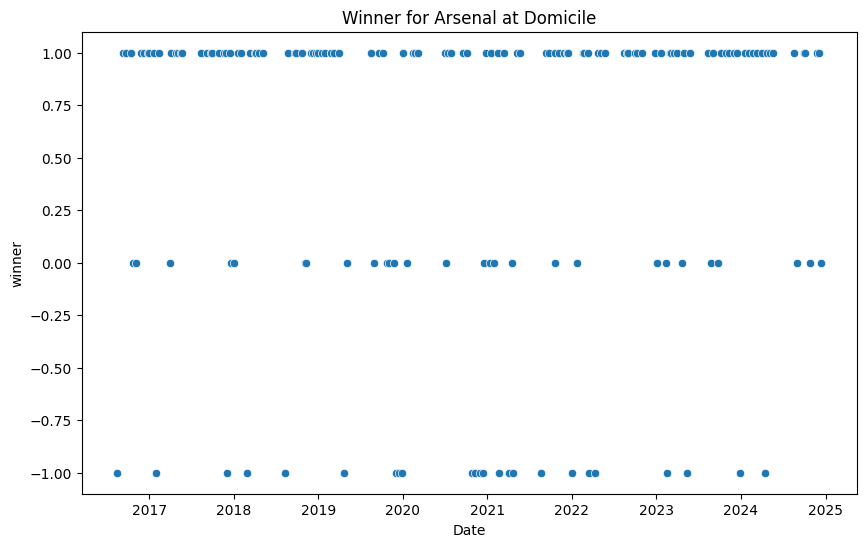

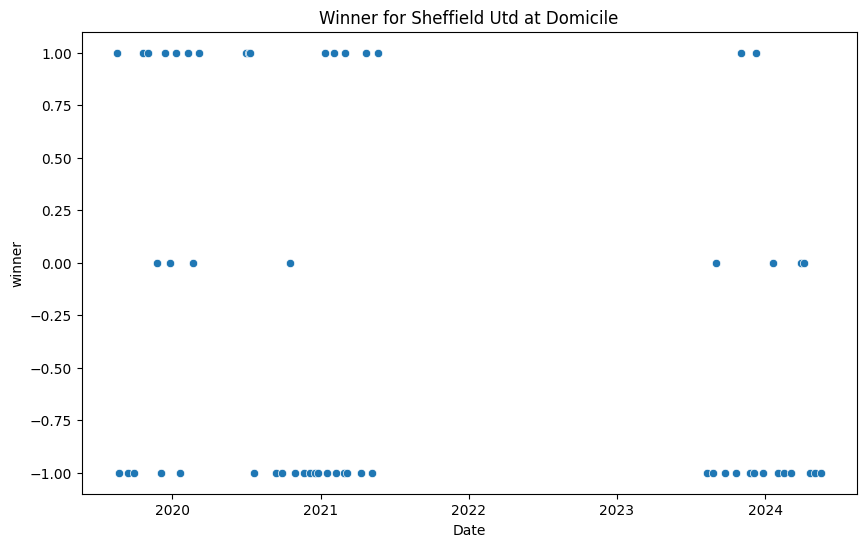

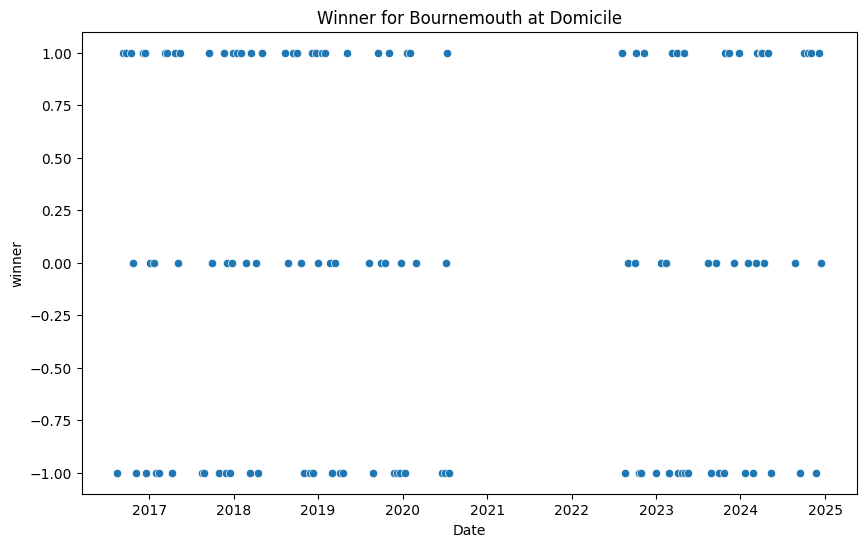

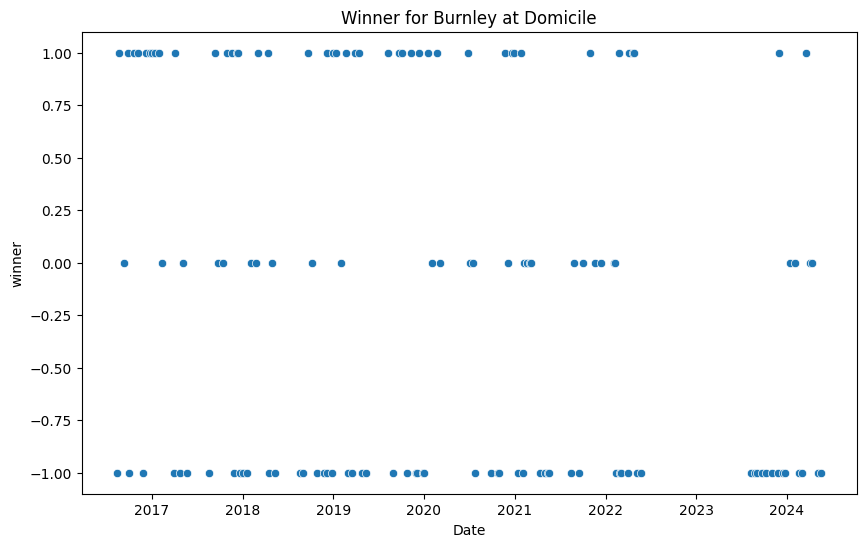

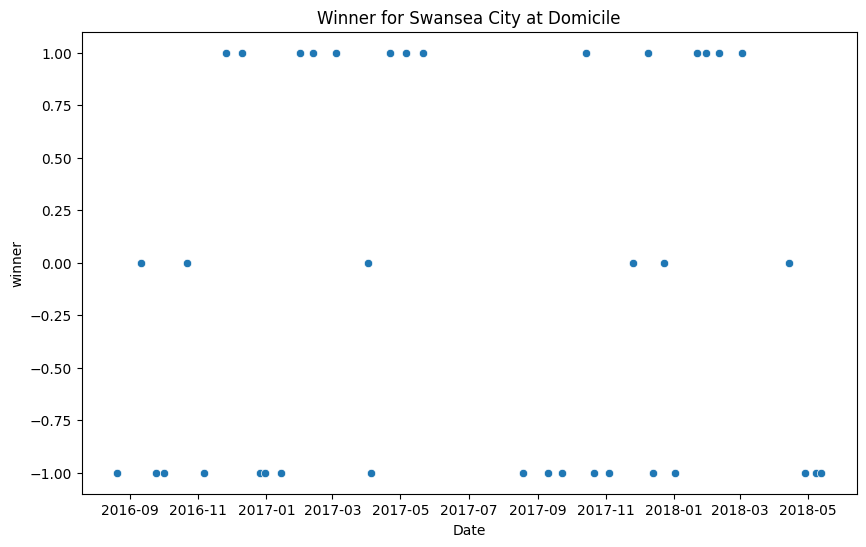

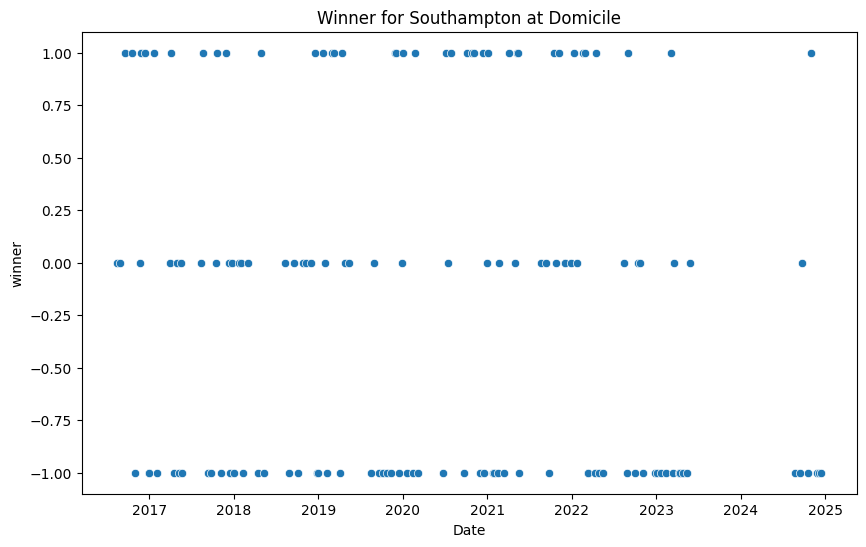

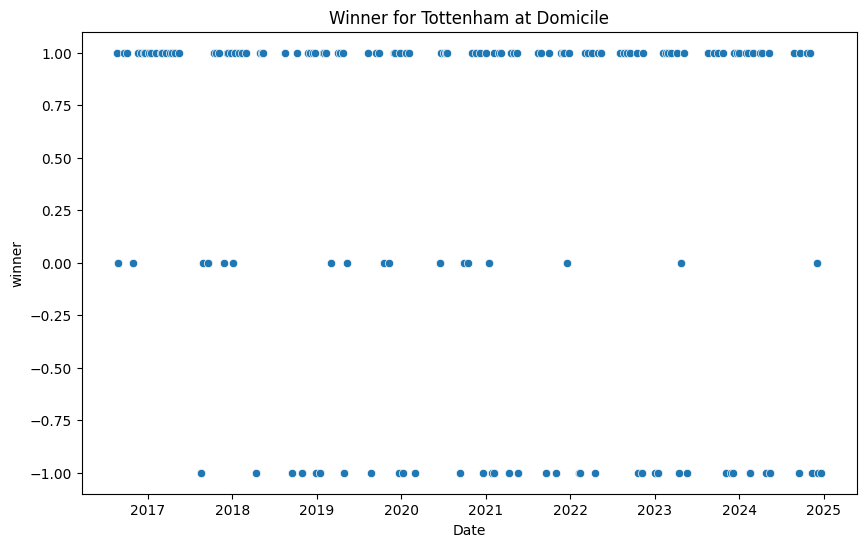

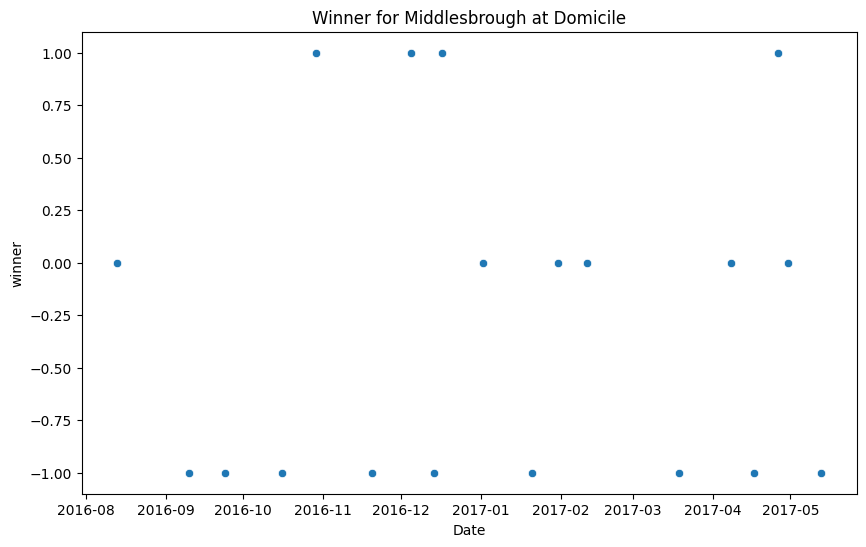

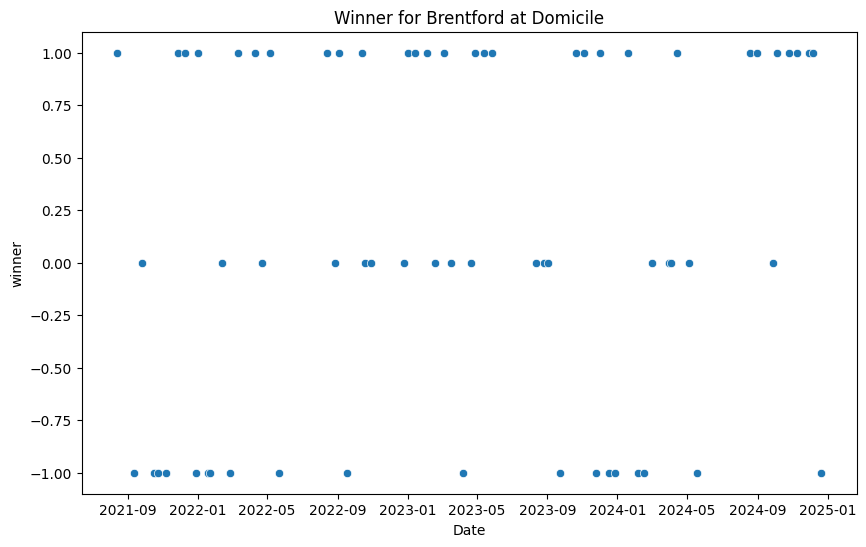

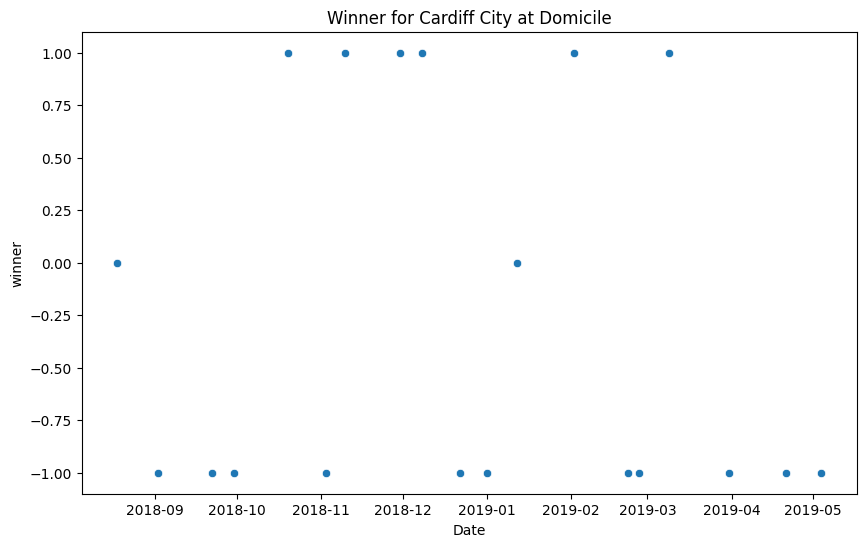

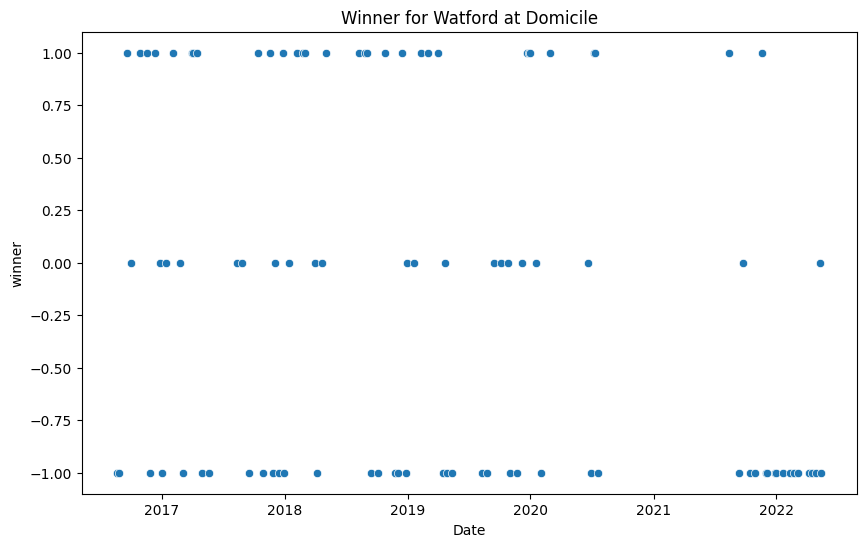

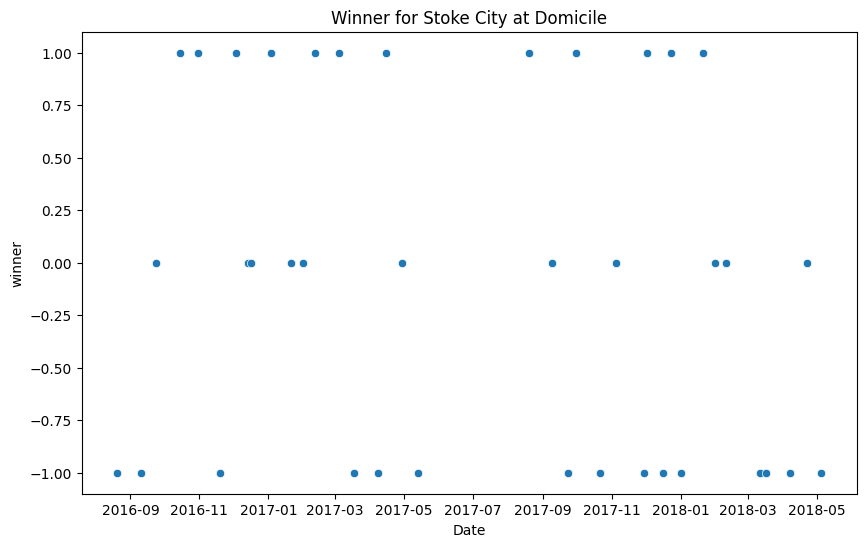

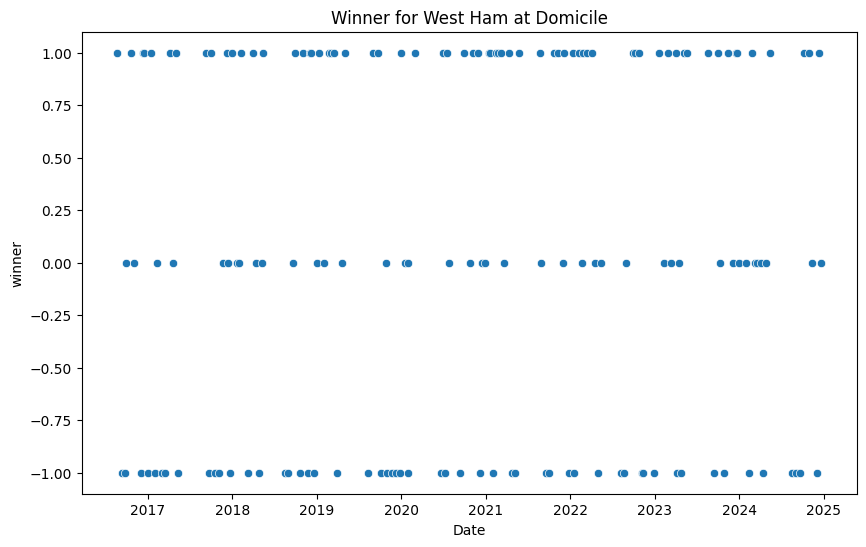

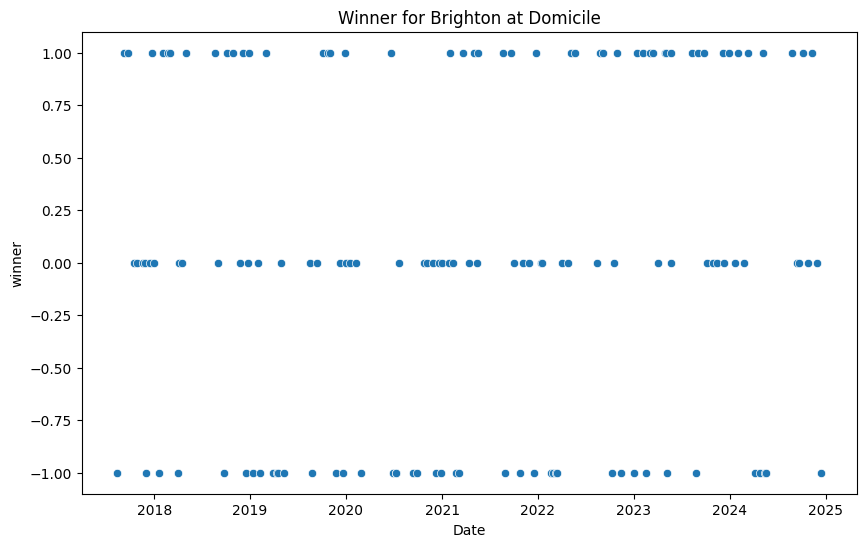

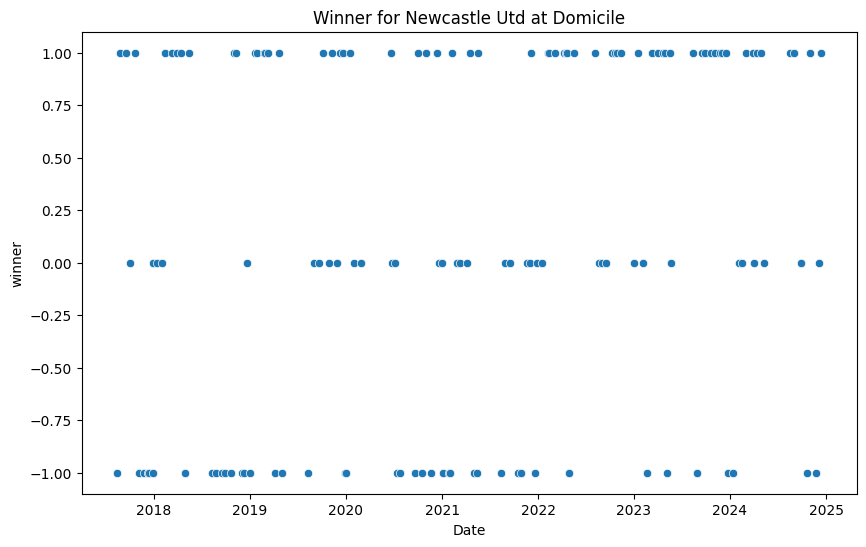

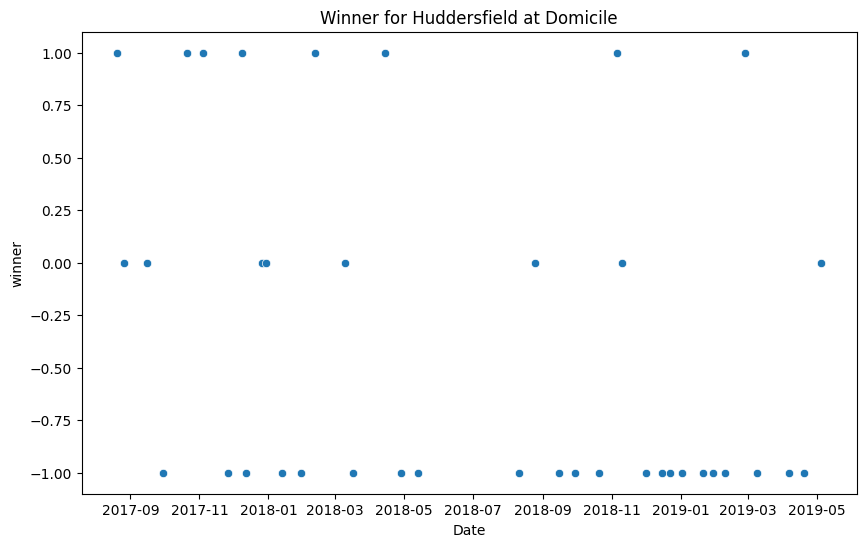

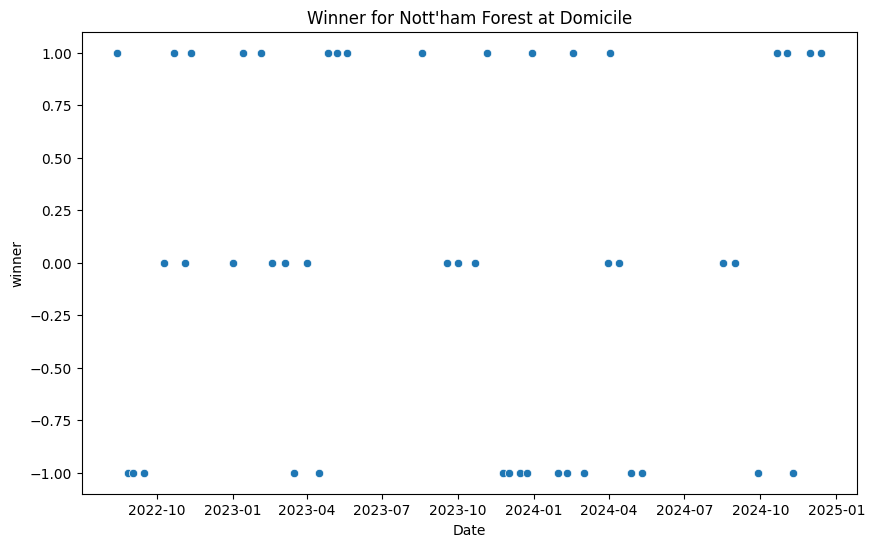

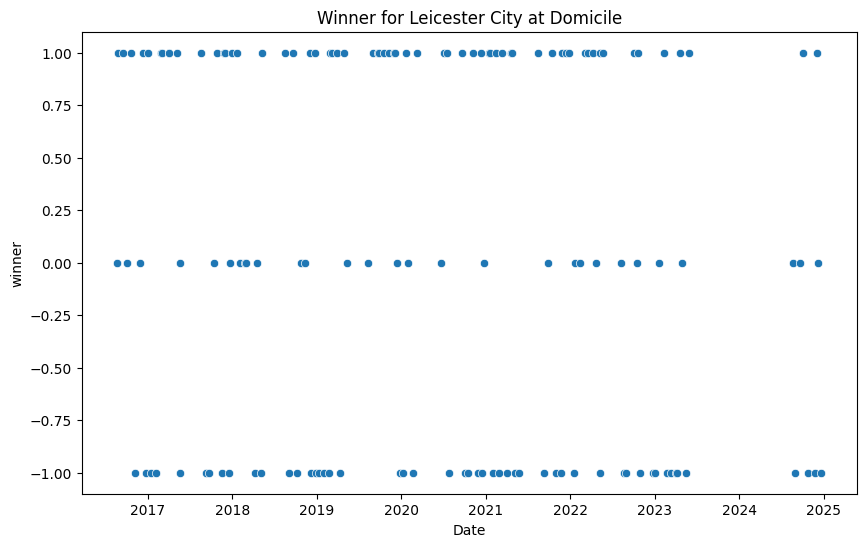

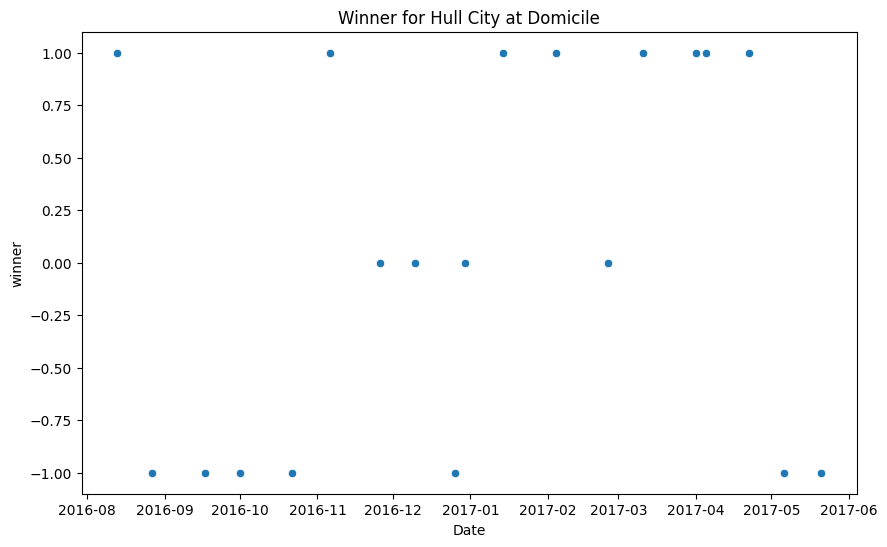

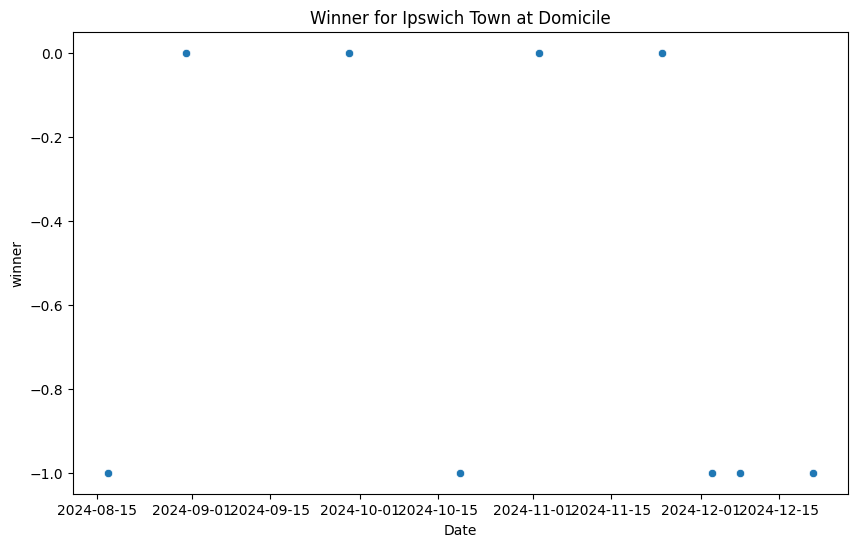

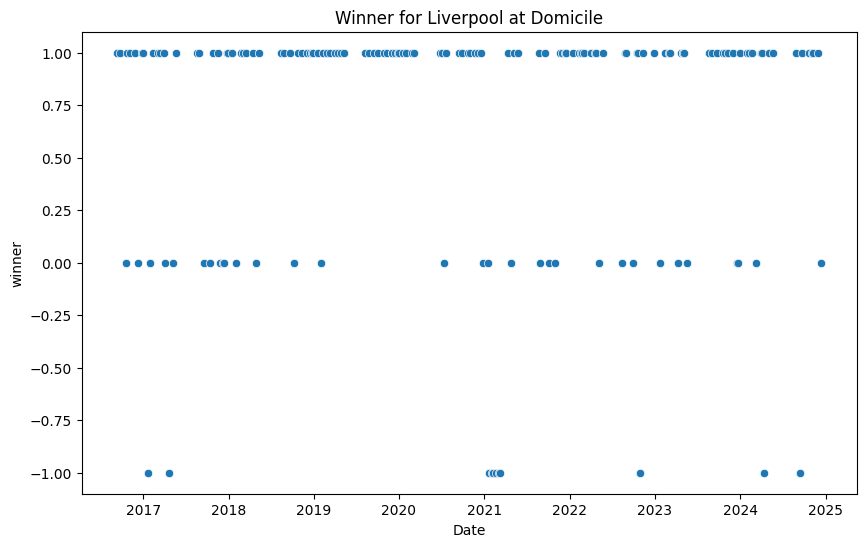

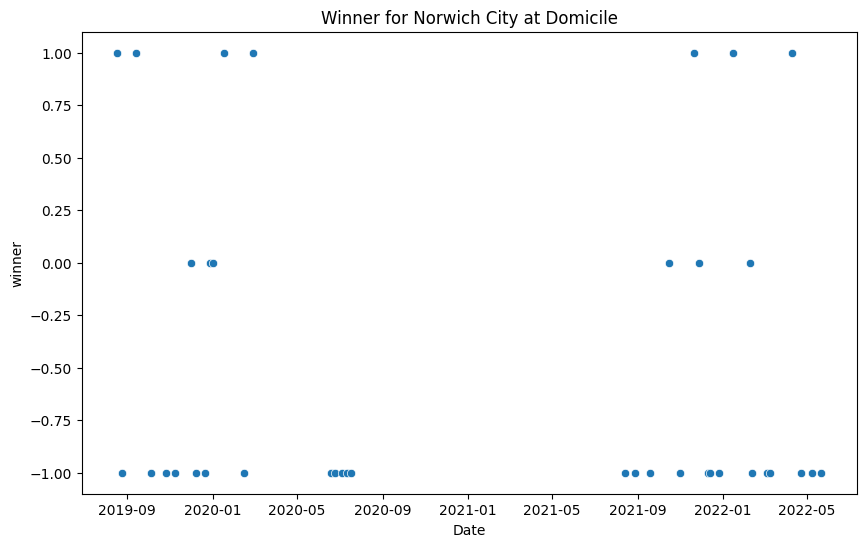

KeyboardInterrupt: 

In [3]:
df2 =df.copy()

clubs = list(set(df2["Domicile"]))

for club in clubs :
    df_to_plot = df2[df2["Domicile"] == club]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_to_plot, x=df_to_plot.index, y="winner").set_title(f'Winner for {club} at Domicile')
    plt.show()

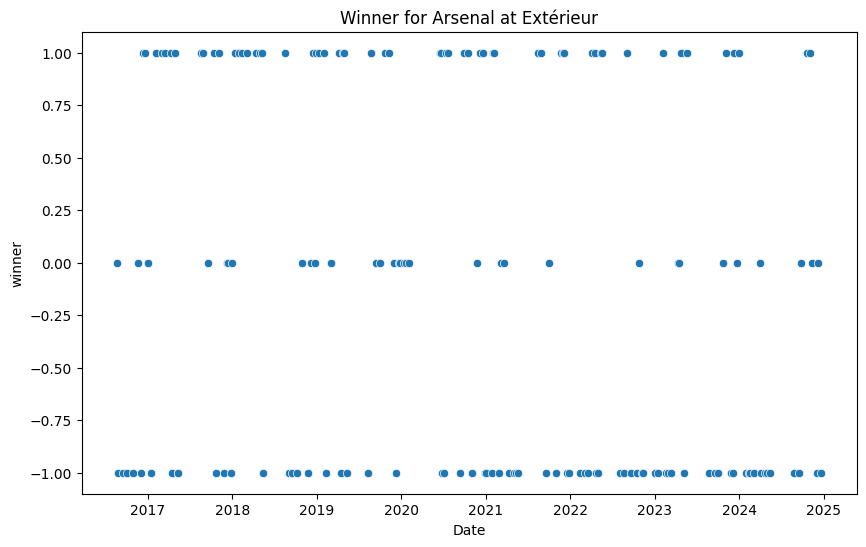

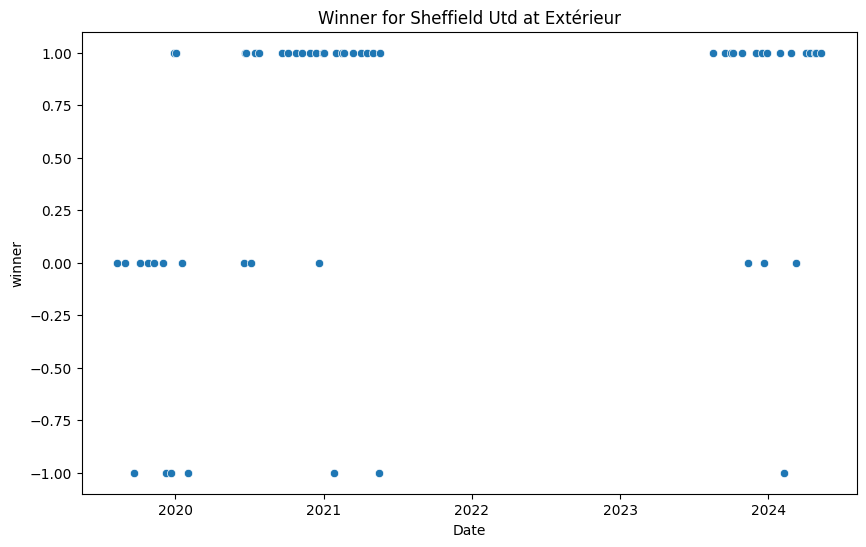

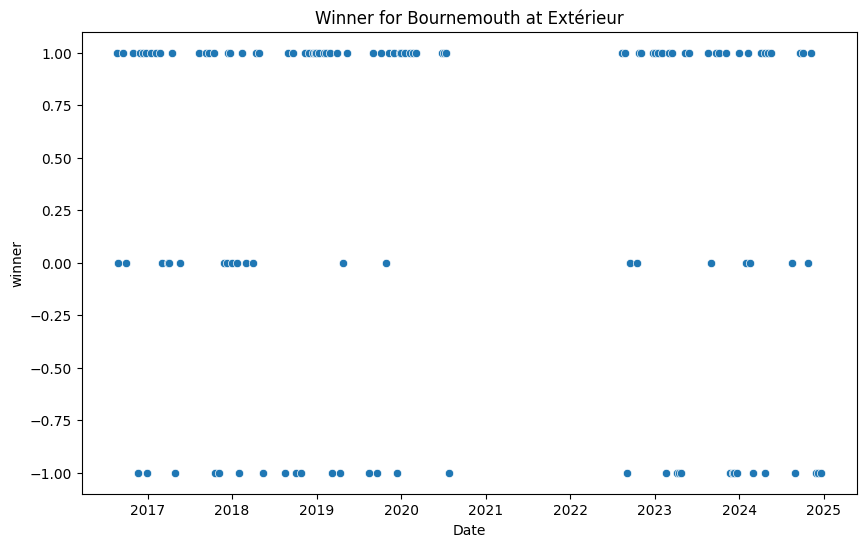

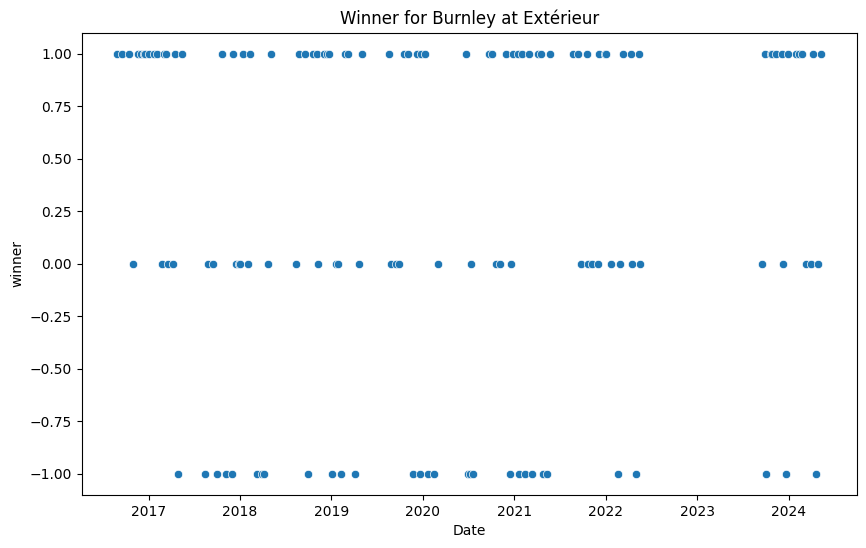

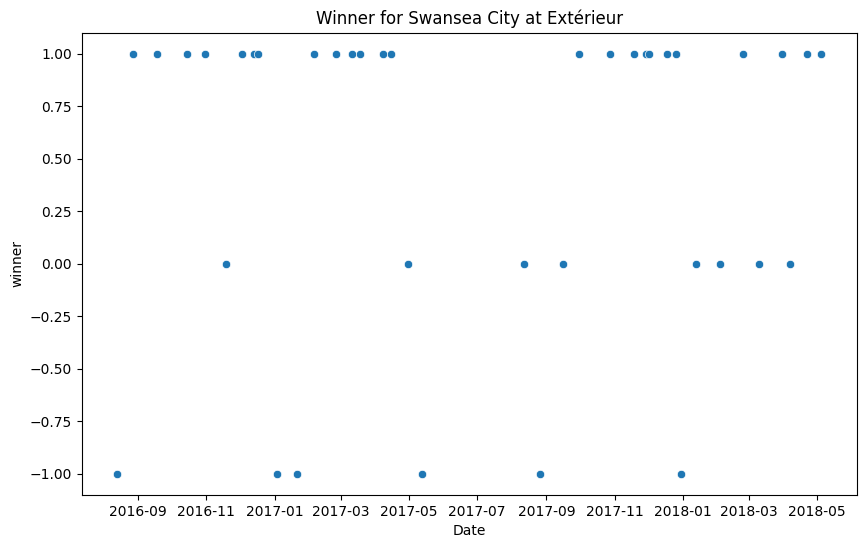

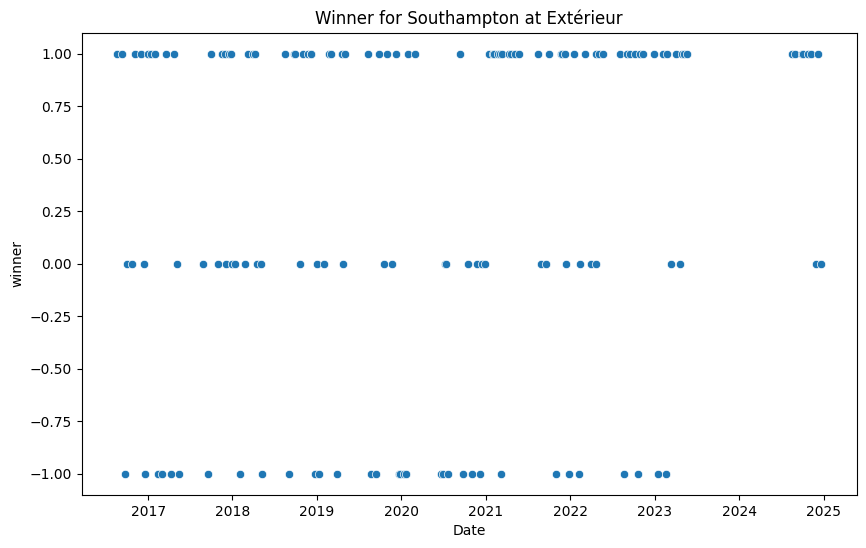

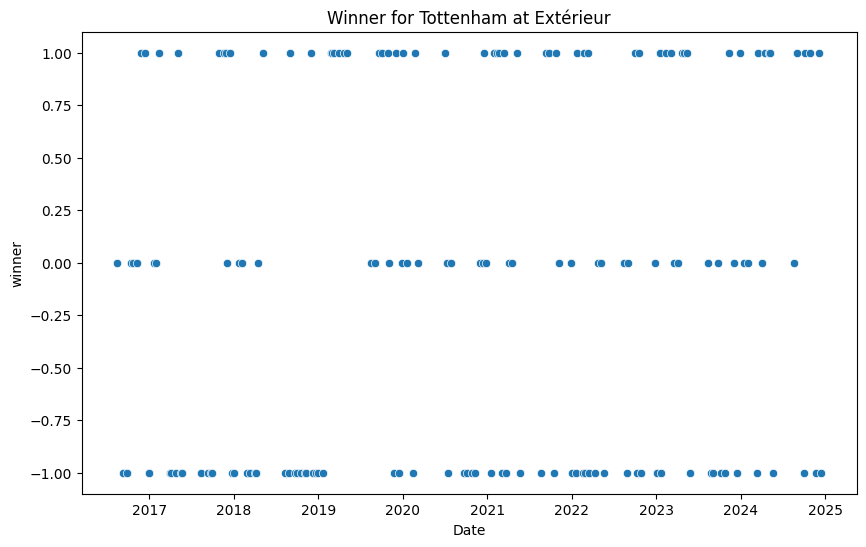

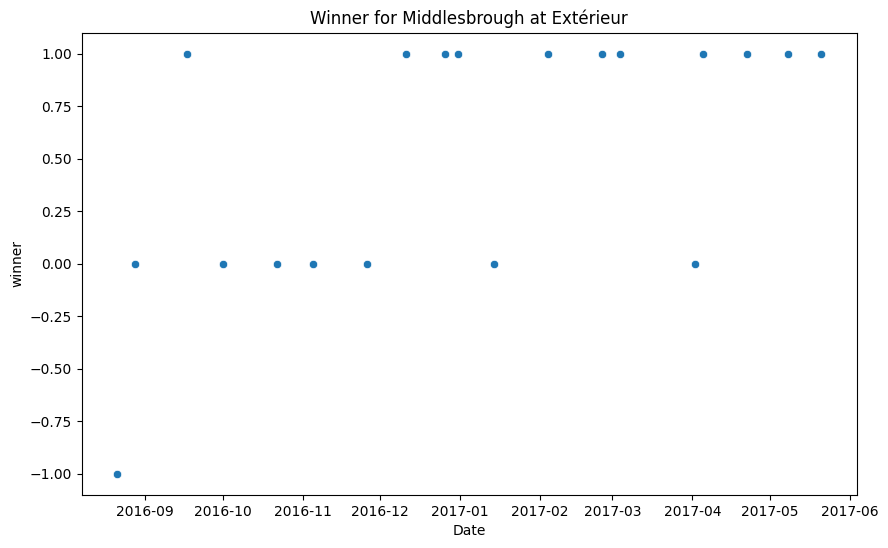

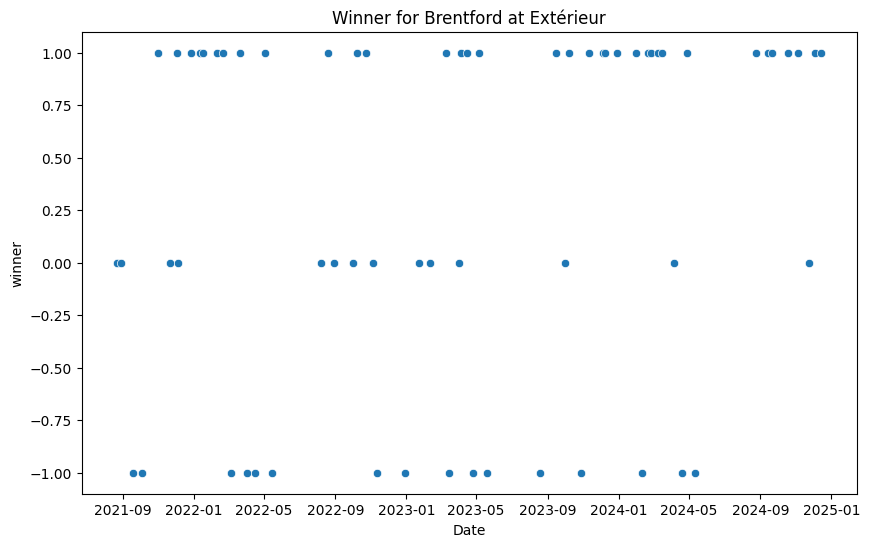

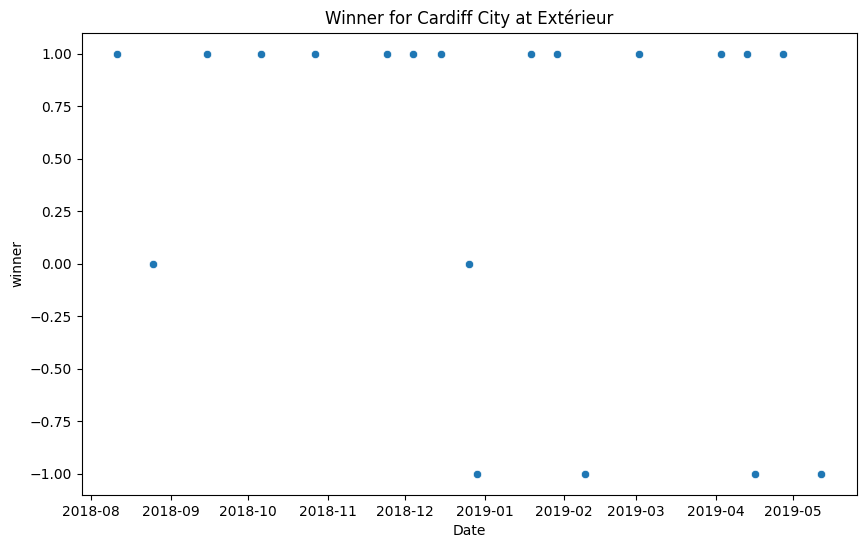

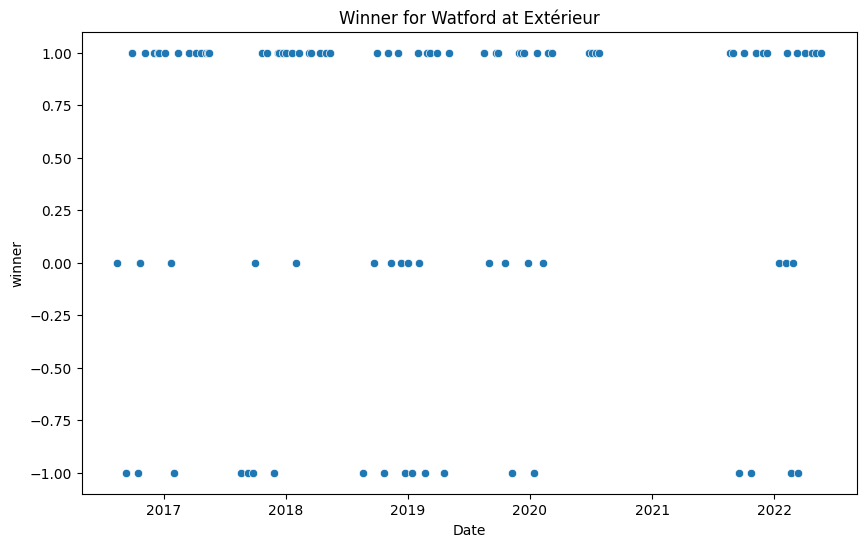

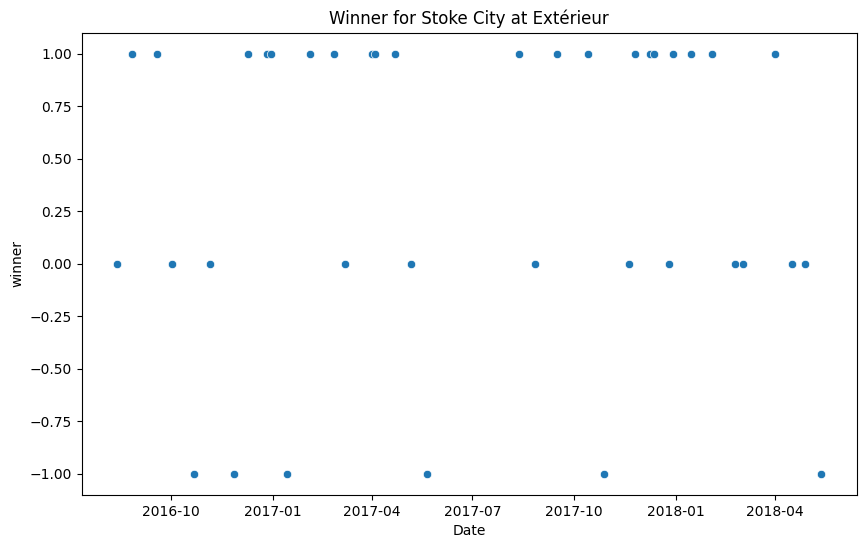

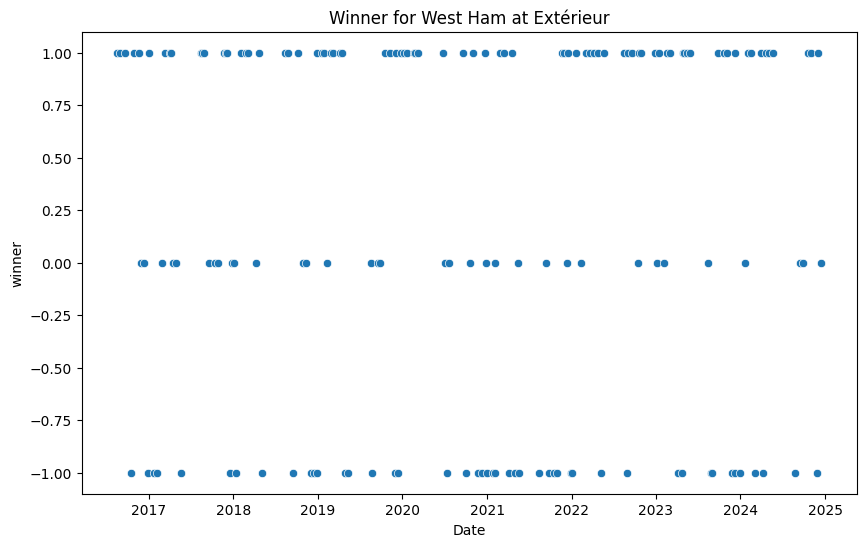

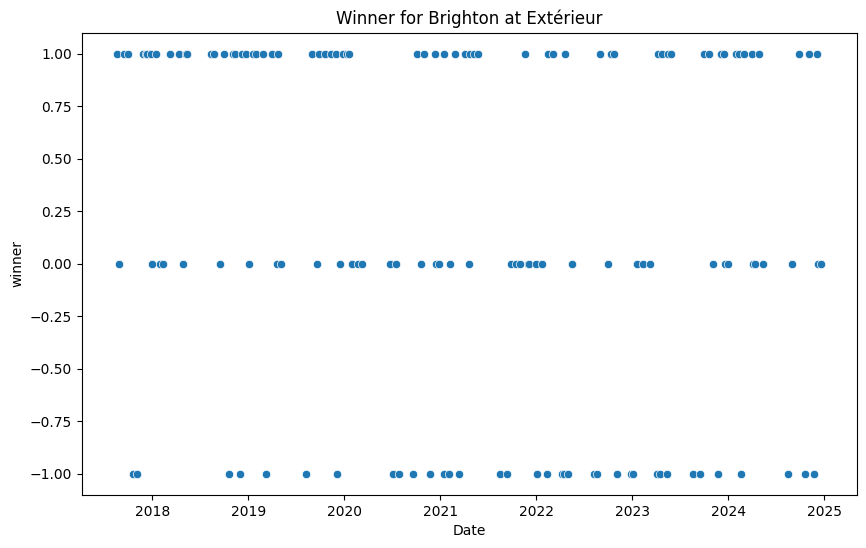

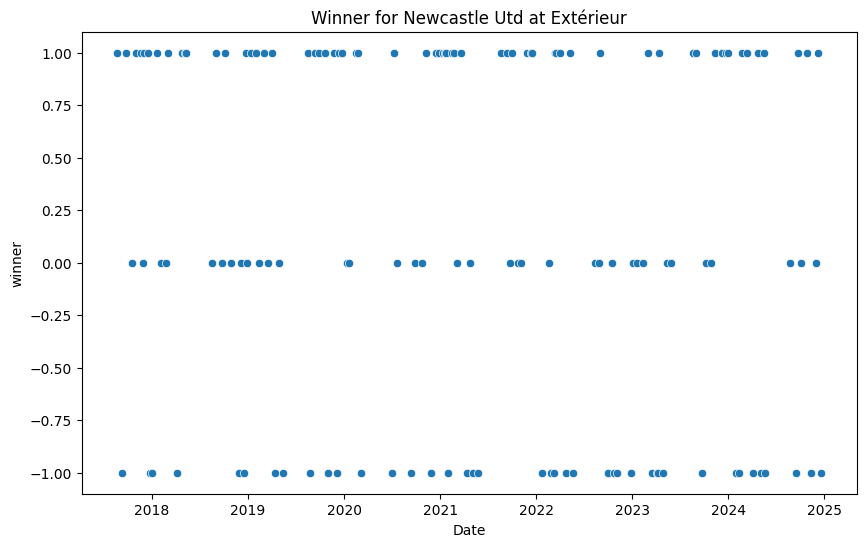

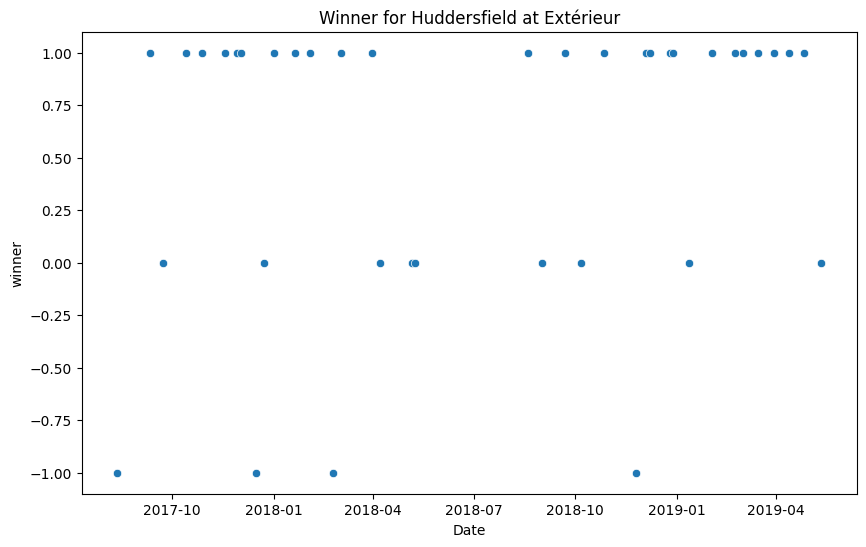

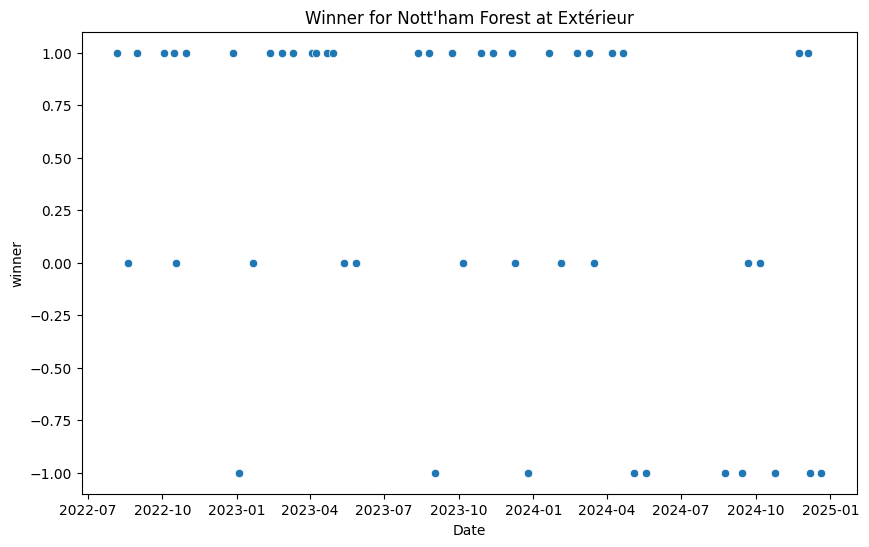

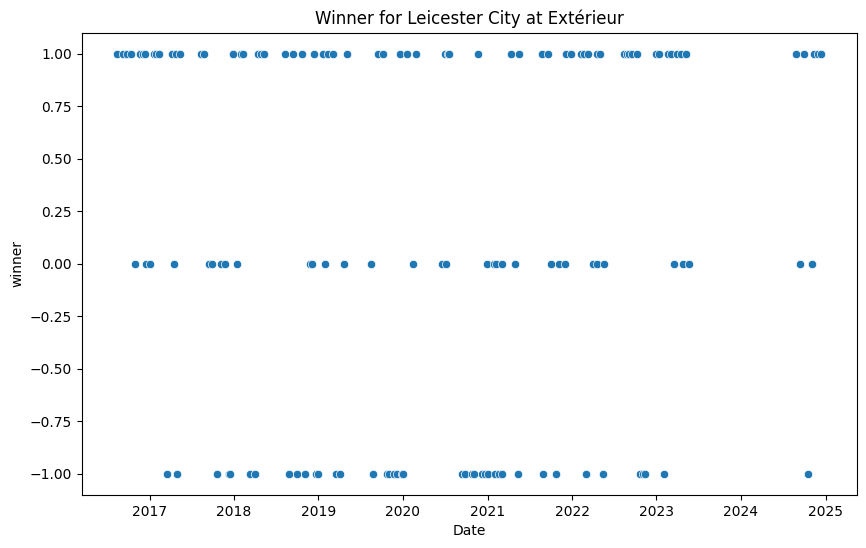

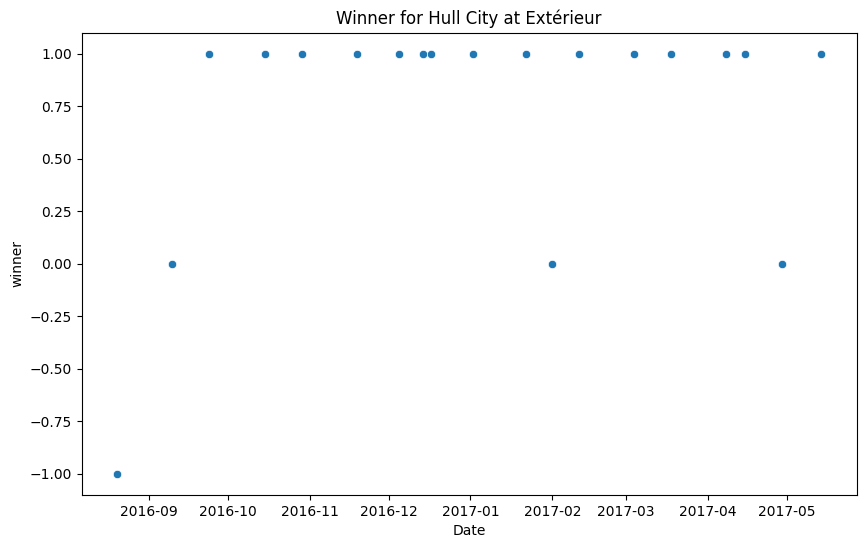

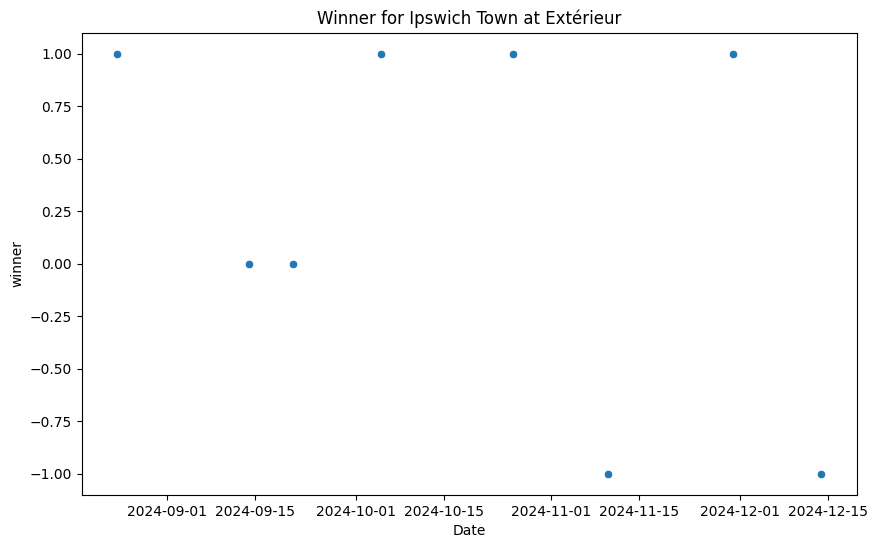

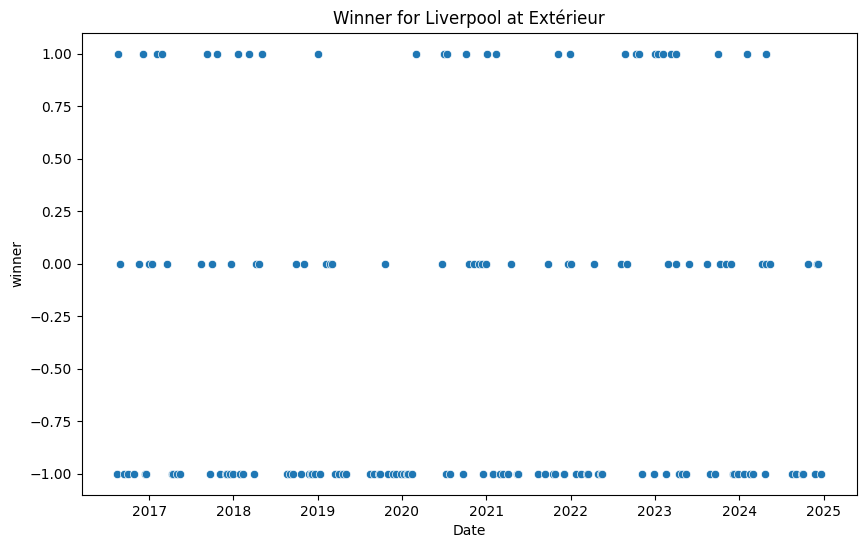

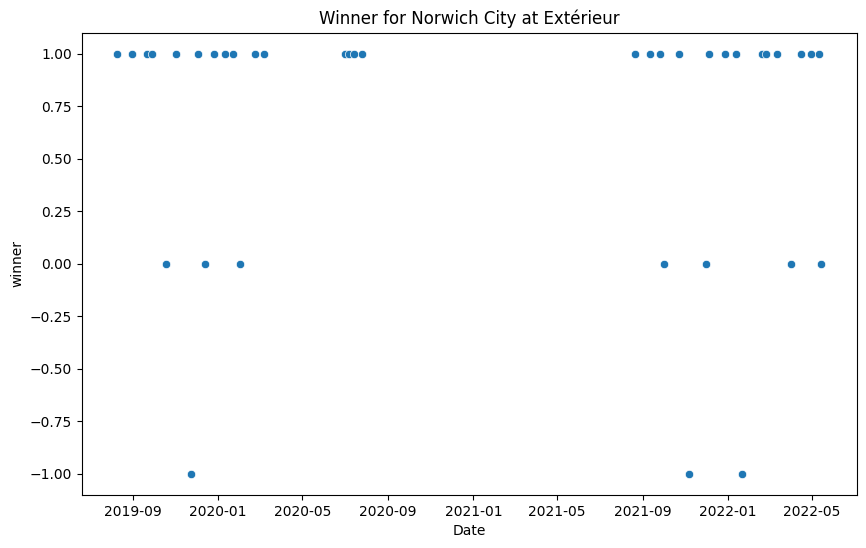

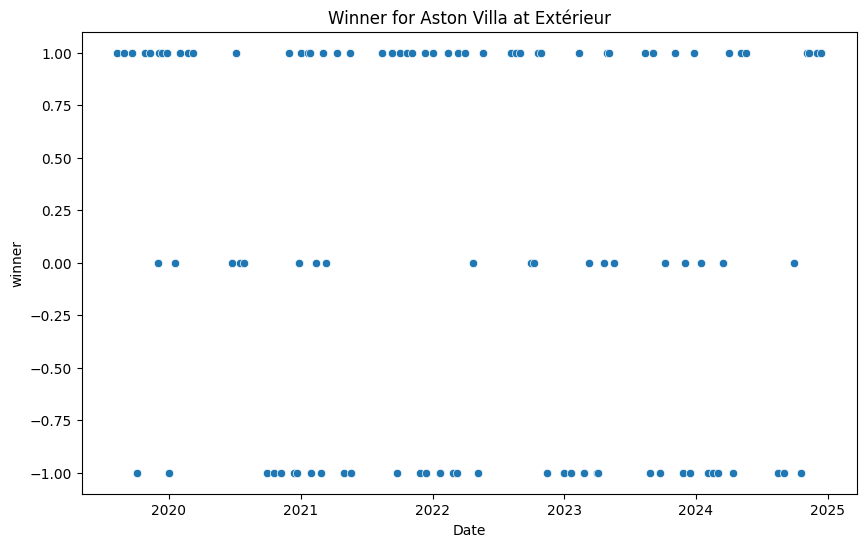

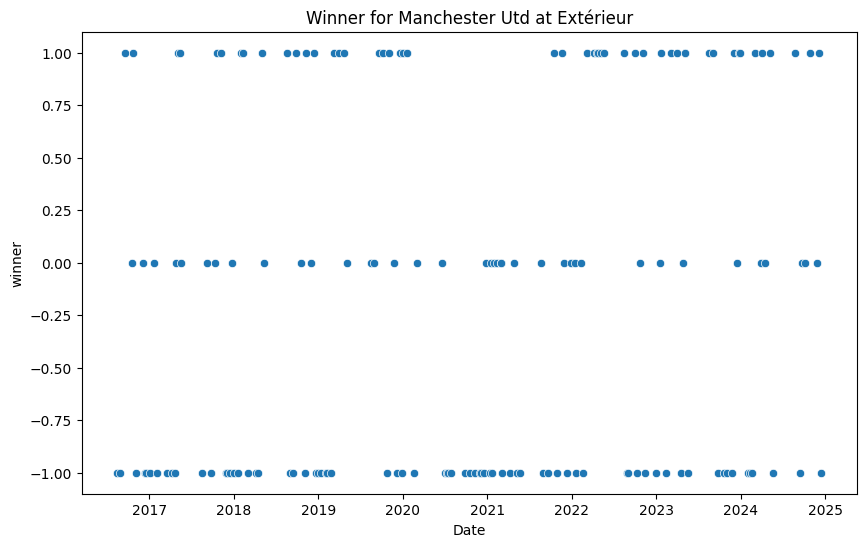

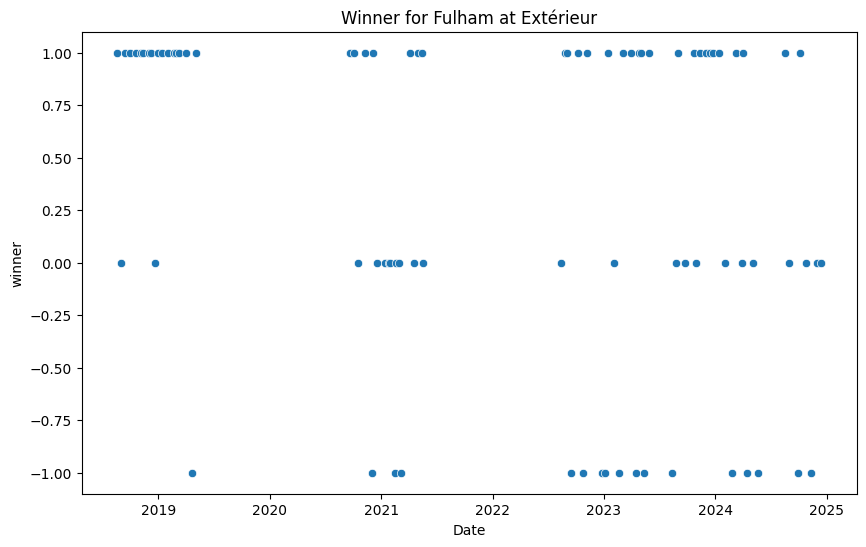

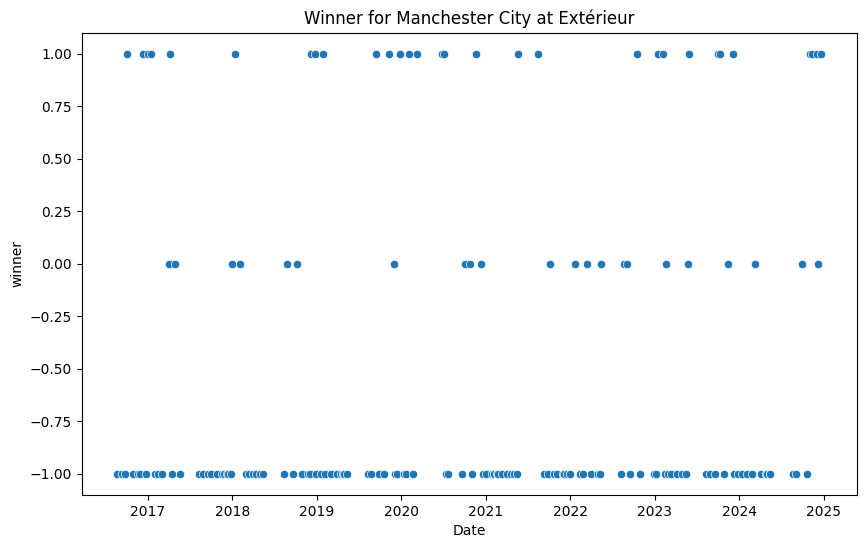

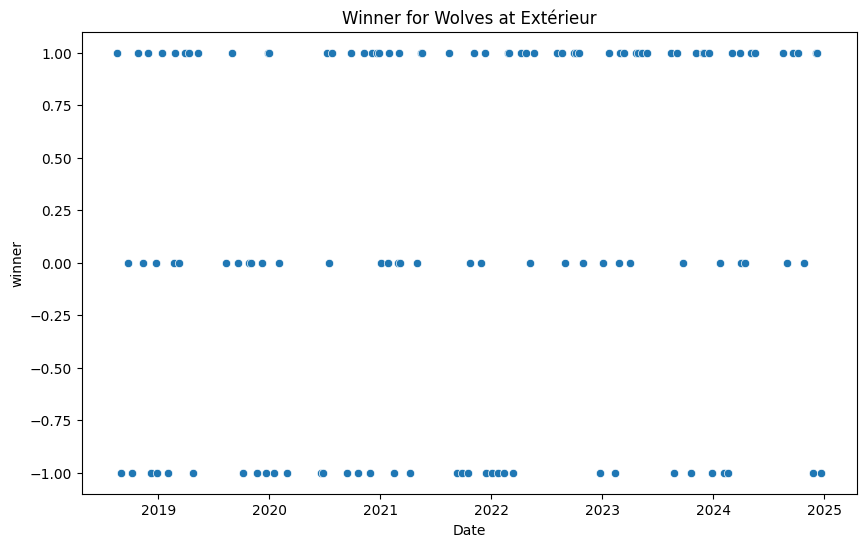

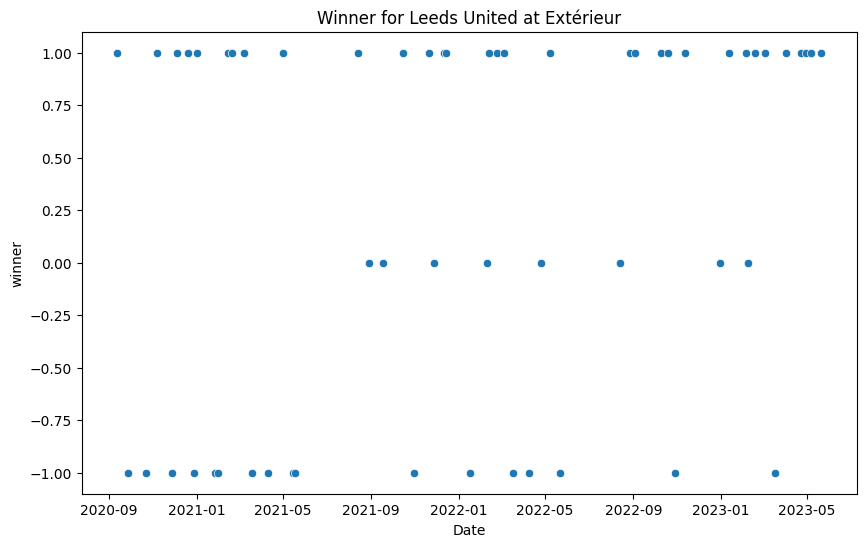

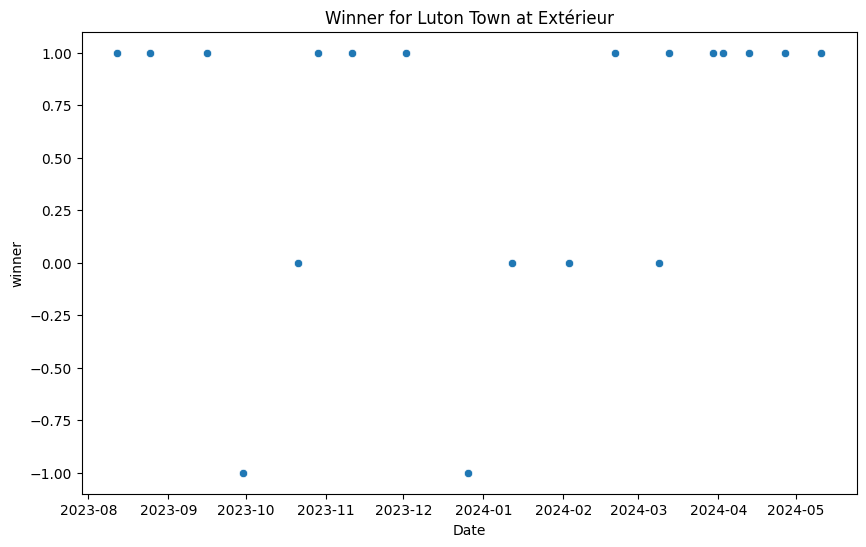

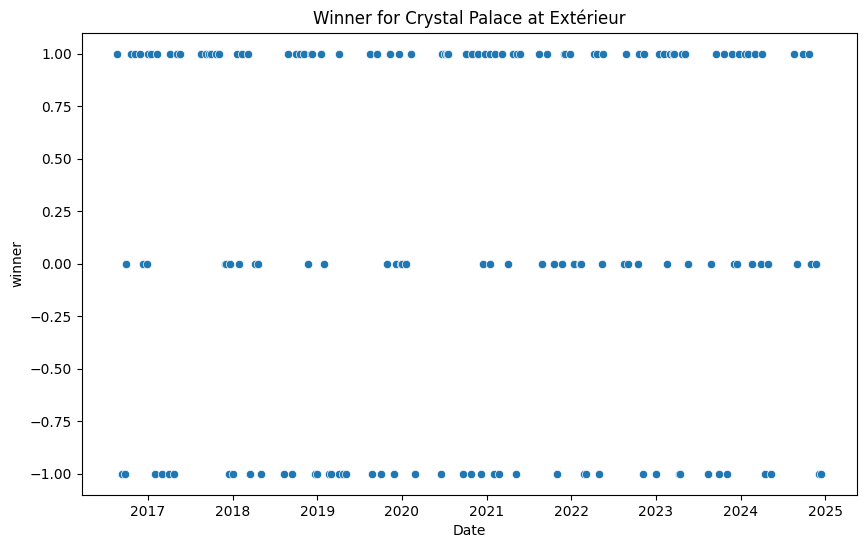

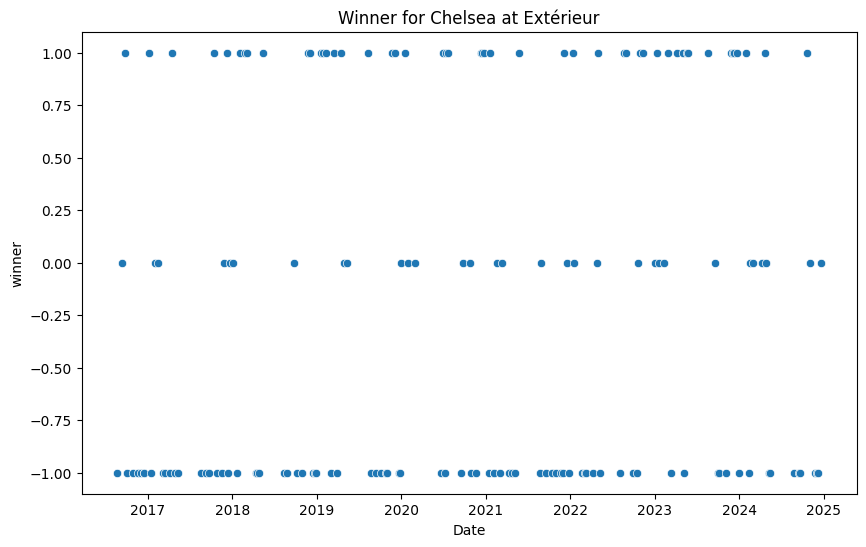

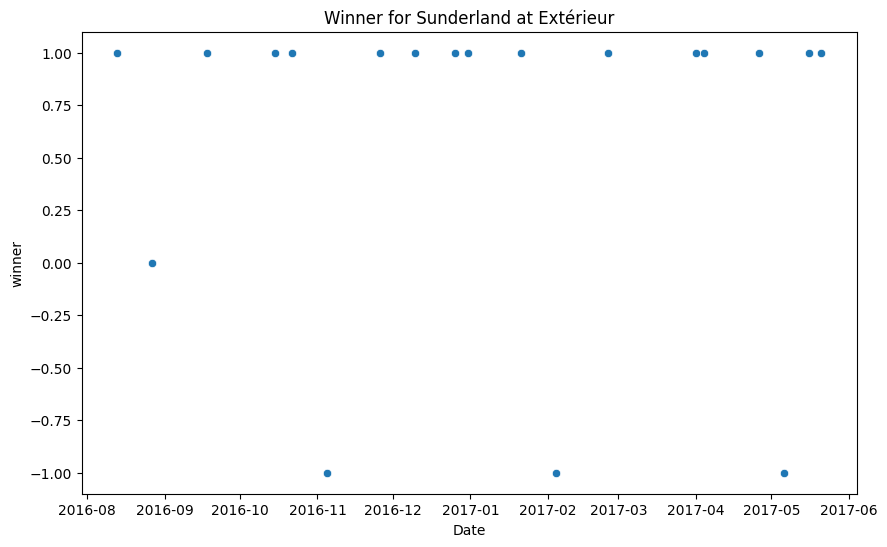

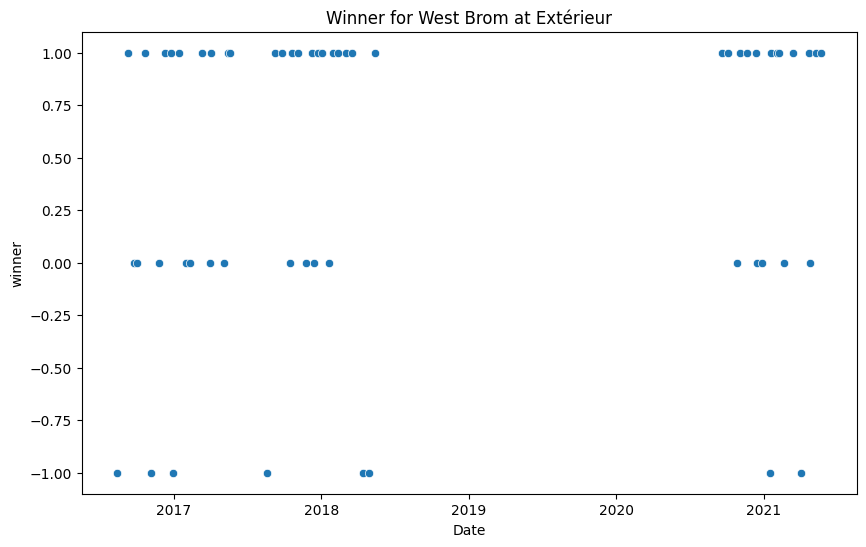

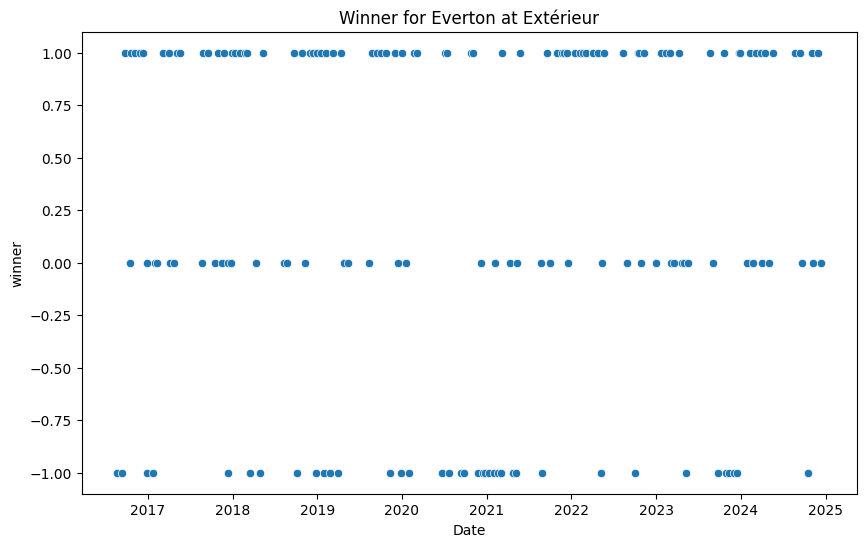

In [4]:
df2 =df.copy()

clubs = list(set(df2["Domicile"]))

for club in clubs :
    df_to_plot = df2[df2["Extérieur"] == club]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_to_plot, x=df_to_plot.index, y="winner").set_title(f'Winner for {club} at Extérieur')
    plt.show()

In [5]:
clubs = list(set(df2["Domicile"]))

for club in clubs :
    df_dom = df2[df2["Domicile"] == club]
    df_ext = df2[df2["Extérieur"] == club]
    esp_dom = df_dom["winner"].value_counts(normalize=True)
    esp_ext = df_ext["winner"].value_counts(normalize=True)
    if 1 not in esp_dom.index:
        esp_dom[1] = 0
    if 1 not in esp_ext.index:
        esp_dom[1] = 0
    print(f'Pour le club {club}, il y a {esp_dom[1]*100:.2f}% de victoire à domicile, {esp_dom[-1]*100:.2f}% de défaite à domicile et {esp_dom[0]*100:.2f}% de match nul à domicile')
    print(f'Pour le club {club}, il y a {esp_ext[1]*100:.2f}% de victoire à l extérieur, {esp_ext[-1]*100:.2f}% de défaite à l extérieur et {esp_ext[0]*100:.2f}% de match nul à l exterieur ')


Pour le club Arsenal, il y a 67.50% de victoire à domicile, 15.00% de défaite à domicile et 17.50% de match nul à domicile
Pour le club Arsenal, il y a 35.40% de victoire à l extérieur, 44.72% de défaite à l extérieur et 19.88% de match nul à l exterieur 
Pour le club Sheffield Utd, il y a 29.82% de victoire à domicile, 56.14% de défaite à domicile et 14.04% de match nul à domicile
Pour le club Sheffield Utd, il y a 64.91% de victoire à l extérieur, 12.28% de défaite à l extérieur et 22.81% de match nul à l exterieur 
Pour le club Bournemouth, il y a 37.70% de victoire à domicile, 36.07% de défaite à domicile et 26.23% de match nul à domicile
Pour le club Bournemouth, il y a 57.72% de victoire à l extérieur, 25.20% de défaite à l extérieur et 17.07% de match nul à l exterieur 
Pour le club Burnley, il y a 32.33% de victoire à domicile, 45.11% de défaite à domicile et 22.56% de match nul à domicile
Pour le club Burnley, il y a 49.62% de victoire à l extérieur, 22.56% de défaite à l exté

Premier League Home Wins by Season and Club


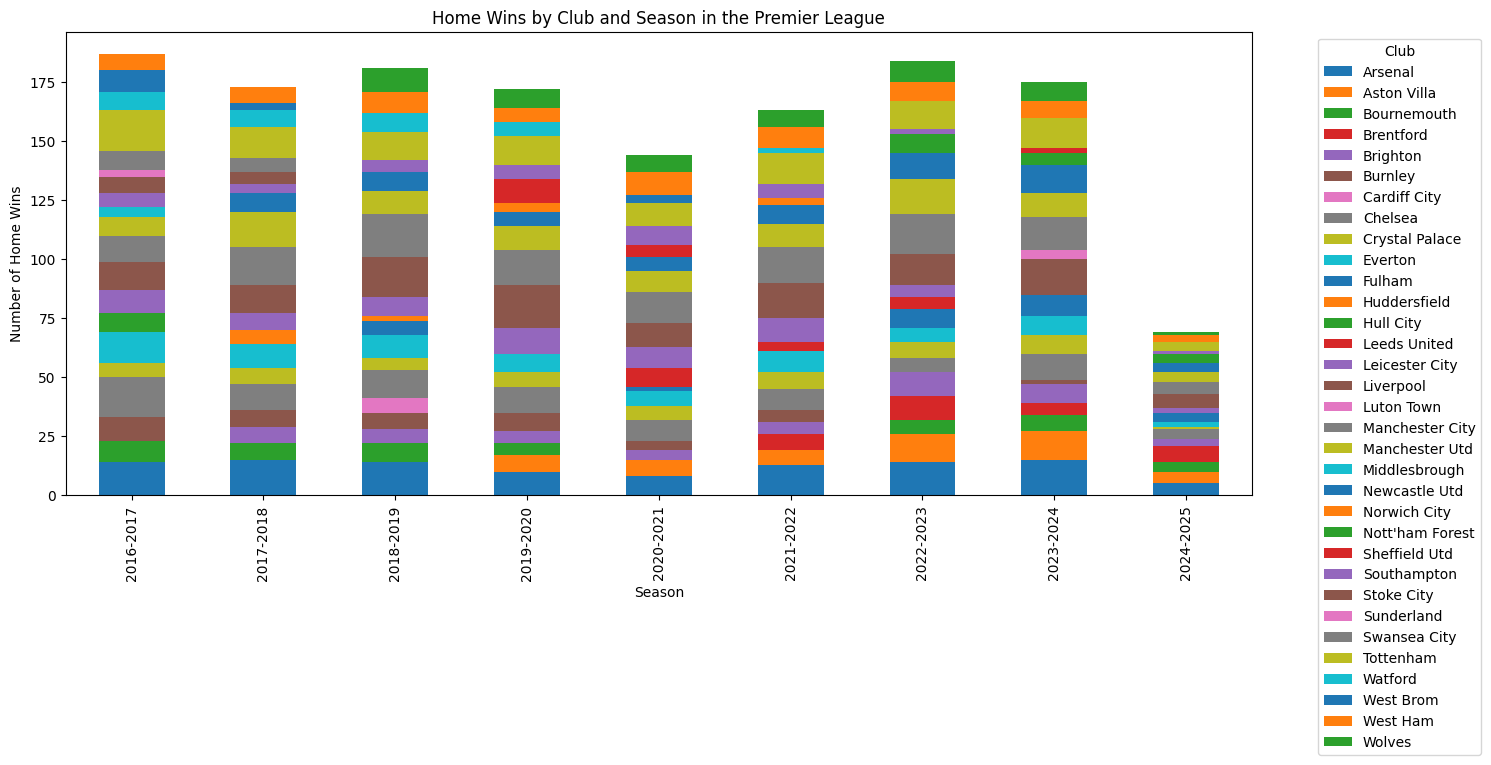

In [6]:
data = pd.read_csv('Calendrier_et_resultats_Premier_League_clean.csv')

# On convertit la colonne Date en datetime
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

# On définit une saison qui commence en août et se termine en mai
data['Season'] = data['Date'].apply(lambda x: f"{x.year}-{x.year + 1}" if x.month >= 8 else f"{x.year - 1}-{x.year}")

home_wins = data[data['winner'] == 1]

# On groupe par Saison et club pour compter le nombre de victoires à domicile
home_wins_count = home_wins.groupby(['Season', 'Domicile']).size().reset_index(name='Home Wins')

tools.display_dataframe_to_user(name="Premier League Home Wins by Season and Club", dataframe=home_wins_count)

pivot_table = home_wins_count.pivot(index='Season', columns='Domicile', values='Home Wins')

# Plotting
pivot_table.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title("Home Wins by Club and Season in the Premier League")
plt.xlabel("Season")
plt.ylabel("Number of Home Wins")
plt.legend(title="Club", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()